In [10]:
#%%

[[참고1] 코드공유 > 따릉이 데이터를 활용한 데이터 분석 (실습파일)](https://dacon.io/competitions/open/235576/codeshare/1276?page=1&dtype=recent)

# 1️⃣  <span style = 'background-color: lightgreen ; color:black'>**library 및 data load**</span>

In [7]:
#%%
import pandas as pd #판다스 패키지 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor #랜덤 포레스트 불러오기

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# 데이터 불러오기
train = pd.read_csv('data/train.csv') # 모델 학습 파일
test = pd.read_csv('data/test.csv') # 모델 시험지 파일
submission = pd.read_csv('data/submission.csv') #답안지 파일 ; 제출 파일 형식

# 2️⃣  <span style = 'background-color: lightgreen ; color:black'>**탐색적 자료분석**</span>
Exploratory Data Analysis (EDA)

### <span style = 'color:orange'> **df.shape** </span>
* df의 행, 열 개수 저장돼있는 <span style = 'color:red'>속성</span>

### <span style = 'color:orange'> **df.info()** </span>
* df의 col별 정보를 알려주는 <span style = 'color:red'>함수</span>
* 비어있지 않은 값 (non-null)은 몇 개인지?
* col의 type은 무엇인지?
    * type의 종류: int(정수), float(실수), object(문자열), ... (date, ...)

### <span style = 'color:orange'> **df.describe()** </span>
* 숫자형 (int, float) col들의 기술 통계량을 보여주는 <span style = 'color:red'>함수</span>

    * 기술통계량이란? <br>
        해당 col을 대표할 수 있는 통계값들을 의미 <br>
        <br>
    * 기술통계량 종류 <br>
        ```
        * count:     해당 column에서 비어있지 않은 값의 개수
        * mean:      평균
        * std:       표준편차
        * min:       최솟값 (이상치 포함)
        * 25% (Q1):  전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값
        * 50% (Q2):  중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)
        * 75% (Q3):  전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값
        * max:       최댓값 (이상치 포함)
        ```
        <br>
    * 이상치: 울타리 밖에 있는 부분을 이상치라고 정의 <br>
        ```
        * 아래쪽 울타리: Q_1Q1 -1.5 * IQR1.5 * IQR
        * 위쪽 울타리:   Q_3Q3 + 1.5 * IQR1.5 * IQR
        * IQRIQR =      Q_3 - Q_1Q3 - Q1
        ```

### <span style = 'color:orange'> **df.head(n)** </span>
* df의 위에서부터 n개 행을 보여주는 <span style = 'color:red'>함수</span>
* n default = 5

### <span style = 'color:orange'> **df.tail(n)** </span>
* df의 아래에서부터 n개 행을 보여주는 <span style = 'color:red'>함수</span>
* n default = 5

### <span style = 'color:orange'> **df.groupby()** </span>
* 집단에 대한 통계량 확인

ex) 습한 날의 count의 평균 이런 걸 볼 수 있음. (우선 습한 정도를 어느정도 기준에 따라 <<심하다/ 보통이다/ 전혀 습하지 않다>> 정도로 전처리 해야함.)

## <span style = 'color:green'> **visualization** </span>

In [1]:
import matplotlib.pyplot as plt

<Figure size 864x216 with 0 Axes>

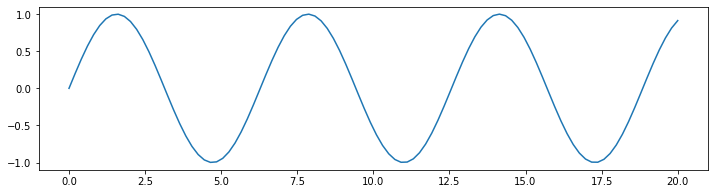

In [17]:
#%%
import numpy as np

x = np.linspace(0, 20, 100)
plt.figure(figsize = (12,3))
plt.plot(x, np.sin(x))

plt.show()


### <span style = 'color:orange'> **plt.title(label, fontsize)** </span>
* 그래프 제목 생성

### <span style = 'color:orange'> **plt.xlabel(label, fontsize)** </span>
* x축 이름 설정

### <span style = 'color:orange'> **plt.ylabel(label, fontsize)** </span>
* y축 이름 설정

### <span style = 'color:orange'> **plt.axvline(x, color)** </span>
* 축을 가로지르는 <span style = 'color:red'>세로 선</span> 생성

### <span style = 'color:orange'> **plt.text(x, y, s, fontsize)** </span>
* 원하는 위치에 텍스트 생성

### <span style = 'color:orange'> **plt.plot의 스타일** </span>
- 색깔
```
문자열      약자
blue        b
green       g
red         r
cyan        c
magenta     m
yellow      y
black       k
white       w
```
<br>

- 마커
```
마커        의미
.           점
o           원 (알파벳)
v           역삼각형 (알파벳)
^           삼각형
s           사각형
*           별
x           엑스
d           다이아몬드
```
<br>

- 선
```
문자열      의미
-	    실선
--	    끊어진 실선
-.	    점+실선
:	    점선
```
<br>

## <span style = 'color:green'> **correlation** </span>
### <span style = 'color:orange'> **df.corr()** </span>
* correlation coefficient의 줄임말 <br>
<br>

* 상관계수: 두 개의 변수가 같이 일어나는 강도를 나타내는 수치.
* -1 ~ 1 사이의 값을 지님.
* -1이나 1인 수치는 현실 세계에서 관측되기 힘든 수치.
* 분야별로 기준을 정하는 것에 따라 달라지겠지만, <u>보통 <span style = 'color = red; font-size = 140%'>0.4 이상</span>이면 두 개의 변수 간에 상관성이 있다</u>고 얘기함.
<br>
<br>

* 💥💥💥상관관계는 인과관계와 다름 <br>
    ex) <br>    
    * 선글라스 판매량이 증가***함에 따라***, 아이스크림 판매액도 ***같이 증가***하는 것을 볼 수 있음.
    * 하지만 선글라스 판매량이 증가했기 ***때문에*** 아이스크림 판매액이 증가했다라고 해석하는 것은 타당하지 않음.
    * 선글라스 판매량이 증가했다는 것은 여름 ***때문***이라고 볼 수 있으므로, 날씨가 더워짐***에 따라*** 선글라스 판매량과 아이스크림 판매액이 같이 증가했다고 보는 것이 타당할 것임.
    <br>
    
    💥 상관관계 ; ~ 함에 따라 (반비례, 비례, ...) <br>
    💥 인과관계 ; ~ 때문에 (야기, 초래, ...)


#### seaborn

In [29]:
import seaborn as sns

* [sns plot 종류]
    - Relational Plot (연속 데이터 관련성)
        - replot
        - scatter
        - lineplot <br>
        <br>
    - Categorical Plot (카테고리 데이터 변화)
        - catplot
        - stripplot
        - swarmplot
        - boxplot
        - violinplot
        - pointplot
        - barplot
        - countplot <br>
        <br>
    - Distribution Plot (데이터 분포)
        - distplot
        - kdeplot
        - rugplot <br>
        <br>
    - Regression Plot (데이터 분포 회귀선)
        - lmplot
        - regplot
        - residplot <br>
        <br>
    - Matrix Plot (여러가지 변수 비교)
        - heatmap
        - clustermap <br>
        <br>
    - Multi-plot grid (여러 개의 그래프)
        - Facetgrid
        - Pairgrid
        - Jointgrid <br>
        <br>
```
데이터의 종류가 연속형 데이터인지, 카테고리 데이터인지, 내가 궁금한 내용이 데이터의 시계열적 변화인지 분포인지에 따라 적합한 그래프를 선택해서 도식화하는 방법을 익힌다면 충분합니다.
```
<br>

[seaborn 시각화 참고자료](https://wikidocs.net/86290)

# 3️⃣  <span style = 'background-color: lightgreen ; color:black'>**데이터 전처리**</span>
Data Cleansing & Pre-Processing

### <span style = 'color:orange'> **srs.isna()** </span>
* 결측치 여부를 확인해줌.
* 결측치면 True, 아니면 False

### <span style = 'color:orange'> **df.fillna()** </span>
* 결측치를 <u>채우고자 하는 column</u>과 <br>
    결측치를 <u>대신하여 넣고자 하는 값</u>을 명시해 줘야 함.

# 4️⃣  <span style = 'background-color: lightgreen ; color:black'>**변수 선택 및 모델 구축**</span>
Feature Engineering & Initial Modeling <br>

### <span style = 'color:orange'> **sklearn.ensemble.RandomForestRegressor()** </span>
* 랜덤 포레스트 모형


# 5️⃣  <span style = 'background-color: lightgreen ; color:black'>**모델 학습 및 검증**</span>
Model Tuning & Evaluation

### <span style = 'color:orange'> **model.fit()** </span>
* 모델 학습

### <span style = 'color:orange'> **model.predict()** </span>
* 모델 예측

### <span style = 'color:orange'> **df.to_csv()** </span>
* csv 파일 저장하는 함수

# 6️⃣  <span style = 'background-color: lightgreen ; color:black'>**결과 및 결언**</span>
Conclusion & Discussion